In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

In [76]:
# embedding_path = Path('1_outputs/standard/CompGCN_X_0.npy')
embedding_path = Path('1_outputs/large/CompGCN_X_0.npy')
ref_df_path = Path('1_outputs/standard/ref_df.csv')

In [77]:
X_all = np.load(embedding_path)

ref_df = pd.read_csv(ref_df_path, index_col=0)
X = X_all[ref_df.index]
y = ref_df['y'].values

In [78]:
tsne = TSNE()
X_tf = tsne.fit_transform(X)

[Text(0.5, 36.72222222222221, 't-SNE 1')]

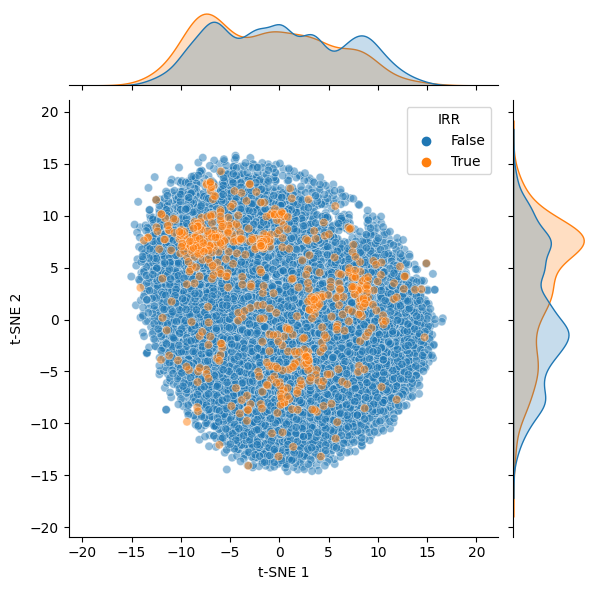

In [79]:
df = pd.DataFrame({'t-SNE 1': X_tf[:, 0], 't-SNE 2': X_tf[:, 1], 'IRR': y})
grid = sns.jointplot(df.sort_values('IRR'), x='t-SNE 1', y='t-SNE 2', hue='IRR', alpha=0.5, marginal_kws=dict(common_norm=False))

plot = grid.ax_joint
plot.set(ylabel='t-SNE 2')
plot.set(xlabel='t-SNE 1')

In [93]:
from scipy.spatial.distance import pdist, squareform

metric = 'euclidean'

dmat = squareform(pdist(X, metric=metric))

dmat_pos = dmat[y][:, y]
ds_pos = dmat_pos[np.triu_indices(dmat_pos.shape[0], k=1)]

dmat_neg = dmat[~y][:, ~y]
ds_neg = dmat_neg[np.triu_indices(dmat_neg.shape[0], k=1)]

ds_neg_samp = np.random.choice(ds_neg, 100000)

In [94]:
ds = dmat[np.triu_indices_from(dmat, k=1)]

In [95]:
df = pd.DataFrame({
    'group': np.r_[np.repeat('IRR', ds_pos.shape[0]), np.repeat('Unknown', ds_neg_samp.shape[0])],
    'distance': np.r_[ds_pos, ds_neg_samp],
})
df['distance'] = (df['distance'] - ds.mean()) / ds.std()

<Axes: xlabel='group', ylabel='distance'>

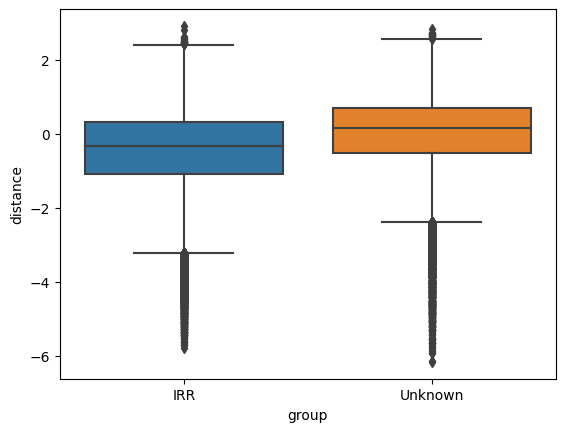

In [96]:
sns.boxplot(df, x='group', y='distance')

<Axes: xlabel='distance', ylabel='Density'>

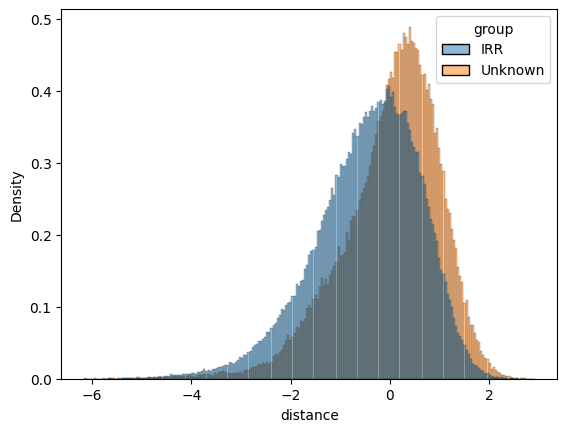

In [97]:
sns.histplot(df, hue='group', x='distance', common_norm=False, stat='density')